In [939]:
# required libs for data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

#data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

#model evaluation
from sklearn.model_selection import cross_val_score

#hyper parameter tuning
from sklearn.model_selection import GridSearchCV

#remove all warning
import warnings
warnings.filterwarnings('ignore')

In [940]:
#import the neccessary data: train test and gender
train = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/train.csv')
test = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/test.csv')
ss = pd.read_csv('/home/machio_b/Documents/Data_Sets/kaggle-titanic/gender_submission.csv')

In [941]:
train.head()
test.head()
ss.head()

print('training:', train.shape , 'testing: ',test.shape)

training: (891, 12) testing:  (418, 11)


EDA : Exploratory Data Analysis

Visualize Data and Extract Insight of our data set

In [942]:
train.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

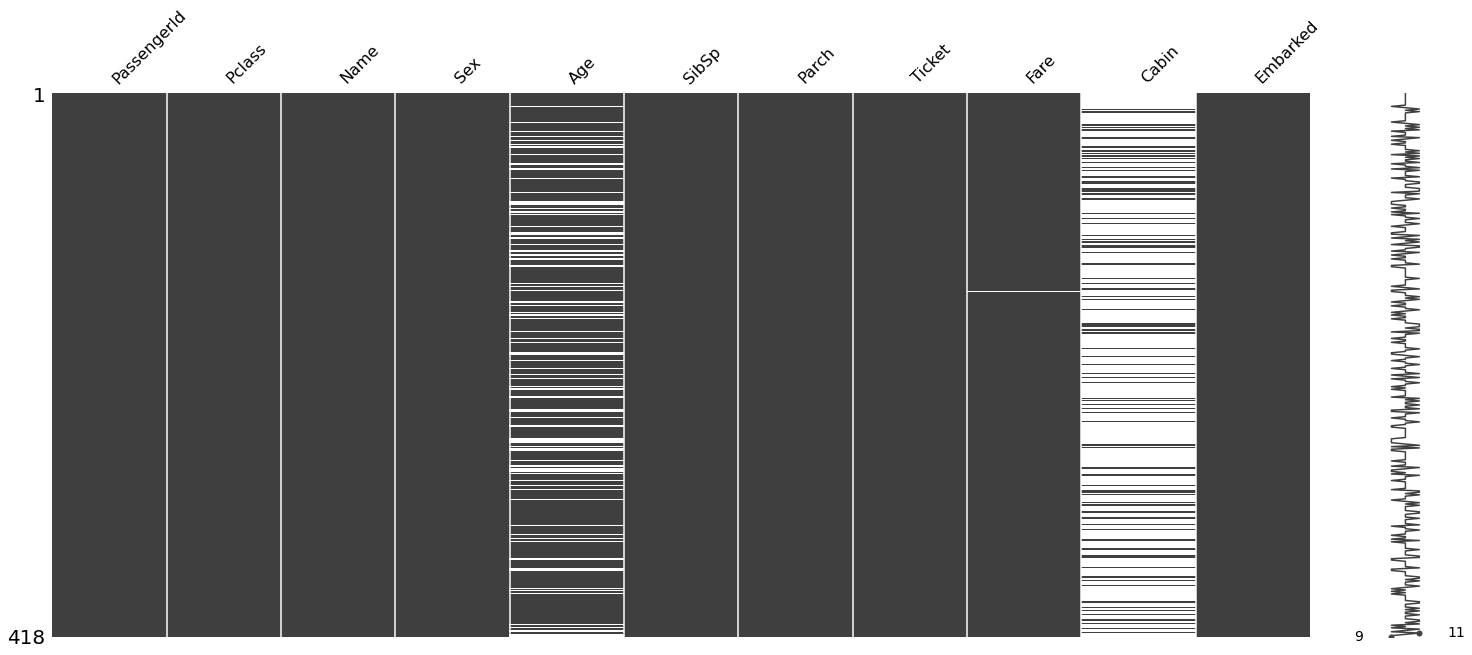

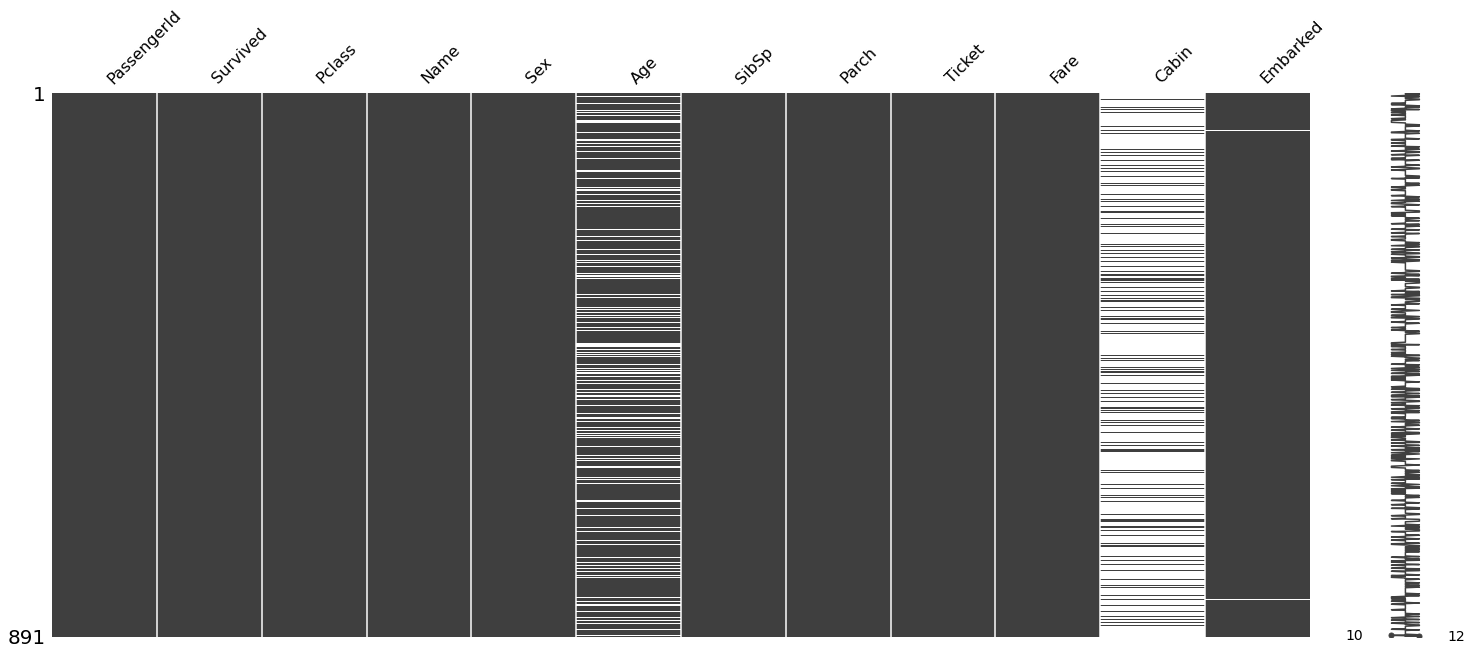

In [943]:
#find the missing data in the training data sets by columns
train.isnull().sum().sort_values()
#find the missing data in the testing data sets by columns
test.isnull().sum()
#diagnose the data via the missingno livrary
missingno.matrix(test)
missingno.matrix(train)

In [944]:
#summary stats for the train/test data sets

train.describe()
#test.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Feature Analysis:
We have both categorical and numerical variables

SEX : Categorical Value

In [945]:
#sex: categorical -> male or female
#performe a value count of the sex columnm

train['Sex'].value_counts(dropna=False) #dropna -> drop all na columns


male      577
female    314
Name: Sex, dtype: int64

In [946]:
#mean of survival by sex
train[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived')

,Sex,Survived
1,male,0.188908
0,female,0.742038


Text(0.5, 1.0, 'Survicval Probability by Gender')

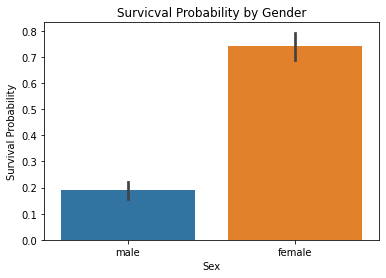

In [947]:
sns.barplot(x='Sex', y='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survicval Probability by Gender')

#its likely that women are more likely to survive than men

PASSANGER CLASS : Categorical Variable

In [948]:
#perform a value count by passanger class column

train['Pclass'].value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [949]:
#the mean of survival by passanger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passanger Class')

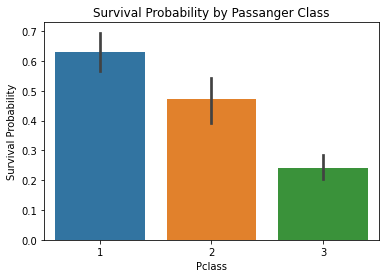

In [950]:
sns.barplot(x='Pclass', y='Survived',data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passanger Class')

#passanger survival decreases with passsanger class
#first class passangers are more likely to be given first priority

Text(0.5, 1.0, 'Survival Prob. by Sex and Passanger Class')

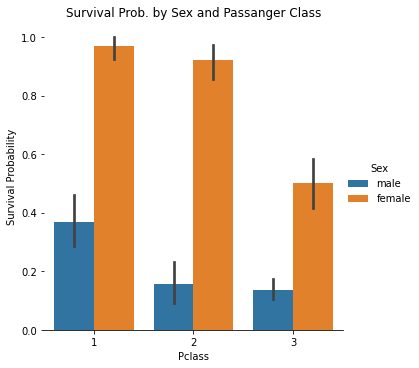

In [951]:
#survival by gender and passanger class
g = sns.factorplot(x='Pclass', y='Survived', hue='Sex', data=train, kind='bar')
g.despine(left=True)
plt.ylabel('Survival Probability')
plt.title('Survival Prob. by Sex and Passanger Class')

EMBARKED: Categorical Variable

In [952]:
#Value count for the Embarked Column

train['Embarked'].value_counts(dropna=False)

#two missing values from the embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [953]:
#mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival probability by Point of Embarkation')

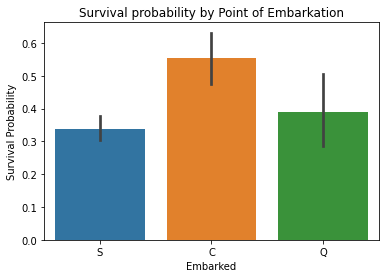

In [954]:
sns.barplot(x='Embarked', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival probability by Point of Embarkation')
#probability of survival by those embarking for C is higher
#hypothetically, most of the first class passsangers were headed for C
# or most of the female were headed for C -> least probable hence eliminated
# or since S has te lowest survival prob., most that embarked for this location were third class
#passangers

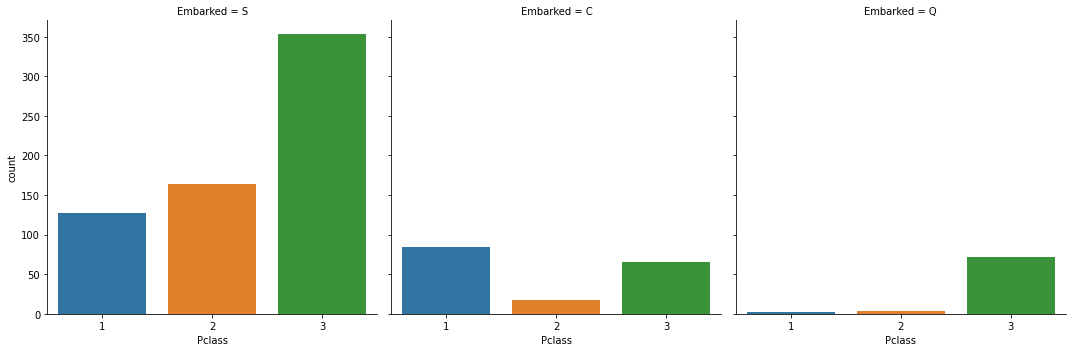

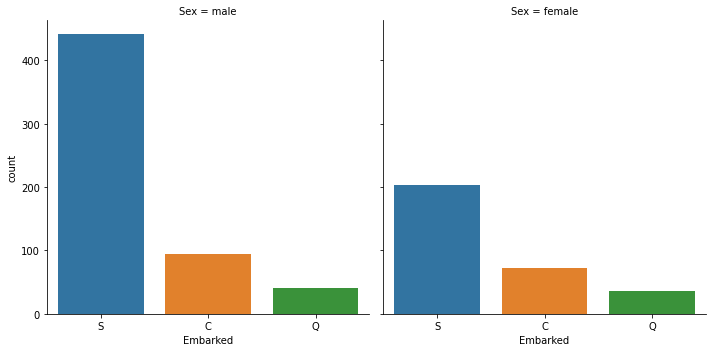

In [955]:
#to test the hypothesis -> plot passanger class count for each destination

sns.factorplot('Pclass', col='Embarked', data=train, kind='count')
sns.factorplot('Embarked', col='Sex', data = train, kind='count')

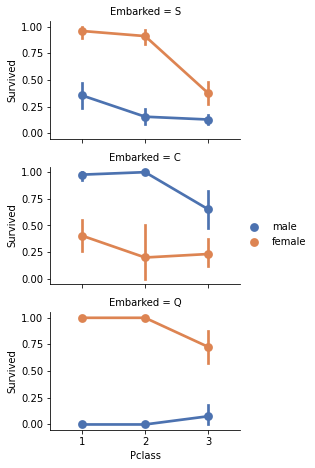

In [956]:
#survival probaility by all categoricak variables

grid = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

NUMERICAL VARIABLES: SiblingSpouse, ParentChildren, Age, Fare

In [957]:
#detect and remove outliers in numerical variables 
#outliers skew the data towards extreem and can cause inaccurate model prediction
#remove using the Tukey Method

def detect_outliers(df, n, features):
    """
    loop through the list of features and do away with data that is 1.5 times the inter-quatile
    range, this is done for each and every feature

    Using the list with outlier indices, we count the frequencies of the index numbers and if the 
    freq exceed n time, we return the list
    """

    outlier_indices = []
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)

        IQR = Q3-Q1
        outlier_step = 1.5*IQR
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col]>Q3+outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value >n)
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print('We will drop these {} indices:'.format(len(outliers_to_drop)), outliers_to_drop)


We will drop these 10 indices: [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [958]:
#outliers in the numerical variables
train.loc[outliers_to_drop, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [959]:
#what are the dropped outliers and the reset index

print("Before: {} rows".format(len(train)))
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)
print("After: {} rows".format(len(train)))

Before: 891 rows
After: 881 rows


Numerical Variable Correlation w/Survival

<AxesSubplot:>

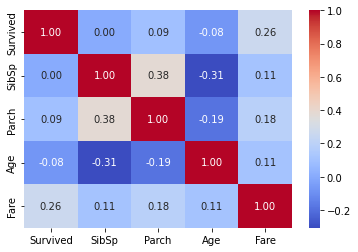

In [960]:
sns.heatmap(train[['Survived', 'SibSp', 'Parch', 'Age', 'Fare']].corr(),annot=True, fmt='.2f',cmap='coolwarm')

#fare seems to be the only feature with substantial correlation w/Survival

In [961]:
#value count of the SibSp column

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     13
5      5
Name: SibSp, dtype: int64

In [962]:
#mean of survival by SibSp
train[['SibSp', 'Survived']].groupby('SibSp',as_index= False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
4,4,0.166667
3,3,0.153846
5,5,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

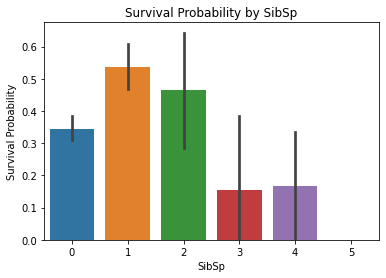

In [963]:
#survival probability by SibSp
sns.barplot(x='SibSp', y='Survived', data=train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [964]:
#numerical variable for parent and children

train['Parch'].value_counts(dropna=False)

0    678
1    118
2     70
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Text(0.5, 1.0, 'Srvival Probability by Parch')

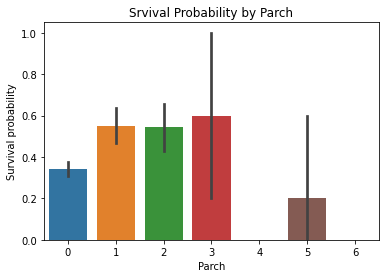

In [965]:
sns.barplot(x='Parch', y='Survived', data = train)
plt.ylabel('Survival probability')
plt.title('Srvival Probability by Parch')

Text(0.5, 1.0, 'Passanger Age Distribution')

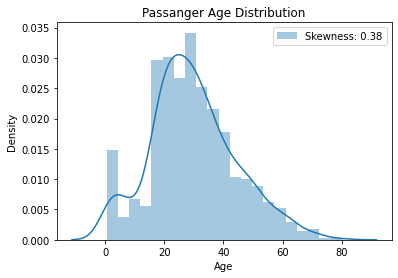

In [966]:
#numerical values in age column

train['Age'].isnull().sum()

#passanger age distribution
sns.distplot(train['Age'], label='Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc='best')
plt.title('Passanger Age Distribution')

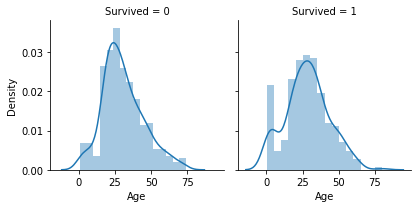

In [967]:
#age distribution by survival
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passanger Age Distribution by Survival')

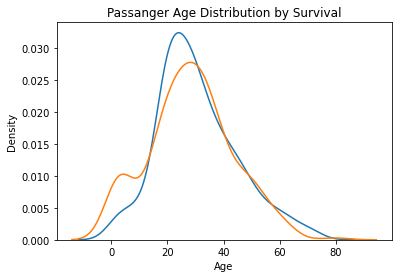

In [968]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not Survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passanger Age Distribution by Survival')

In [969]:
#how many null values do we have for vehicle fare
train['Fare'].isnull().sum()

0

Text(0, 0.5, 'Passanger Fare Distribution')

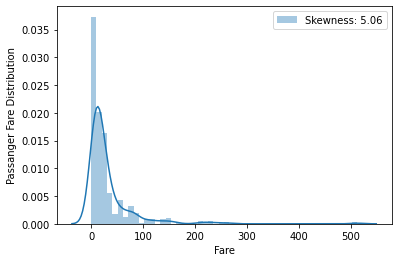

In [970]:
#therefore the Passsanger Fare distribution

sns.distplot(train['Fare'], label='Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.ylabel('Passanger Fare Distribution')

#we have an extreemly high skewness -> we will address during data preprocessing, log transformation

DATA PREPROCESSING

In [971]:
#drop the cabin and ticket features from training and test set

train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)

In [972]:
#Missing values in the training data set

train.isnull().sum().sort_values(ascending=False)

Age            170
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
dtype: int64

In [973]:
#compute the most frequent value of embarked in trainig set
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [974]:
#fill the missing value in embark with mode
train['Embarked'].fillna(mode, inplace=True)

In [975]:
train.isnull().sum().sort_values(ascending=False)

Age            170
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [976]:
#find the missing values in test datasets
test.isnull().sum().sort_values(ascending=False)

Age            86
Fare            1
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Embarked        0
dtype: int64

In [977]:
#find the modal fair value: the most occuring and use it to fill the missing
mode = test['Fare'].dropna().mode()[0]
mode

#use this mode to fill the missing fare value
test['Fare'].fillna(mode, inplace=True)

#view the fill if successful
test.isnull().sum().sort_values(ascending=False)

Age            86
PassengerId     0
Pclass          0
Name            0
Sex             0
SibSp           0
Parch           0
Fare            0
Embarked        0
dtype: int64

In [978]:
#Combine the tarining set and the test set
combine = pd.concat([train, test],axis=0).reset_index(drop=True)
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [979]:
#find the missing value in the combined dataset
combine.isnull().sum().sort_values(ascending=False)

#all the survived are from the test
#we need to fill missing values in the Age column


Survived       418
Age            256
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [980]:
#encode sex: male=0, female=1; encode by mapping

combine['Sex'] = combine['Sex'].map({'male':0, 'female' :1})

We need to find an age value that will fill the missing column

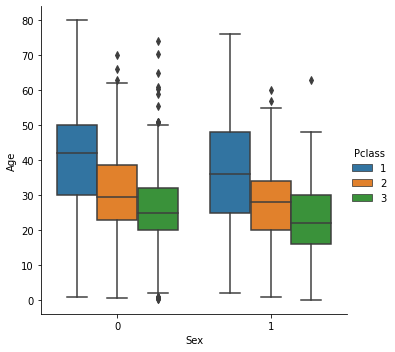

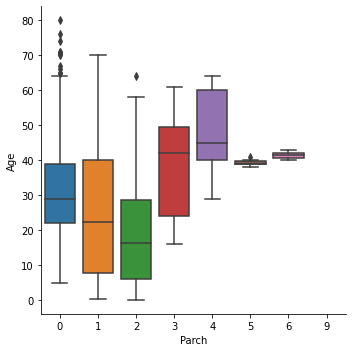

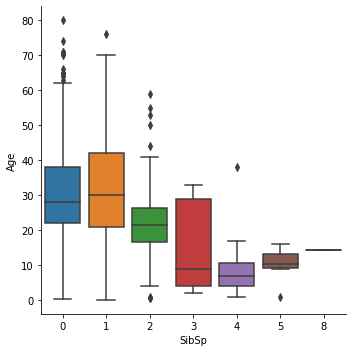

In [981]:
sns.factorplot(y='Age', x = 'Sex', hue='Pclass', kind='box', data=combine)
sns.factorplot(y='Age', x='Parch', kind='box', data=combine)
sns.factorplot(y='Age', x='SibSp', kind='box', data=combine)

<AxesSubplot:>

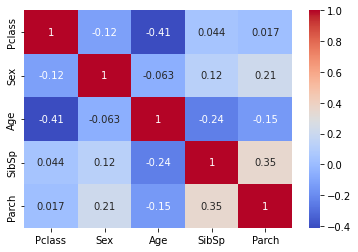

In [982]:
sns.heatmap(combine.drop(['Survived', 'Name', 'PassengerId', 'Fare'], axis=1).corr(), annot=True, cmap='coolwarm')

#age is not correlated with sex but is negatively correlated wih SibSp, Parch, Pclass
#-ve correlation: as one value increases, others decrease

In [983]:
#check the number of missing ages
age_nan_indices = list(combine[combine['Age'].isnull()].index)
len(age_nan_indices)

256

Loop through each missing age in the list to locate the rows that have the same SibSp, Parch, Pclass values and fill the missing age with the median of those rows

If the rows are not found fill the missing age with median of the entire age column

In [984]:
#loop through the list and impute missing ages
for index in age_nan_indices:
    median_age = combine['Age'].median()
    predict_age = combine['Age'][(combine['SibSp']==combine.iloc[index]['SibSp'])
                                & (combine['Parch']==combine.iloc[index]['Parch'])
                                & (combine['Pclass']==combine.iloc[index]['Pclass'])].median()

    if np.isnan(predict_age):
        combine['Age'].iloc[index] = median_age
    else:
        #print('Null')
        combine['Age'].iloc[index] = predict_age


#check for ages filled
combine['Age'].isnull().sum()

0

DATA TRANSFORMATION

Text(0.5, 1.0, 'Passenger Fare Distribution')

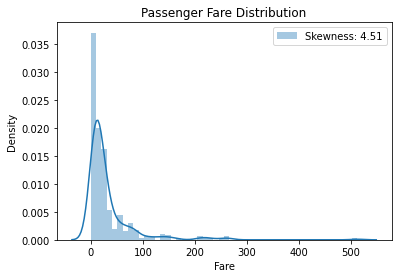

In [985]:
#passanger fare distribution has ultra-high skewness
sns.distplot(combine['Fare'], label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

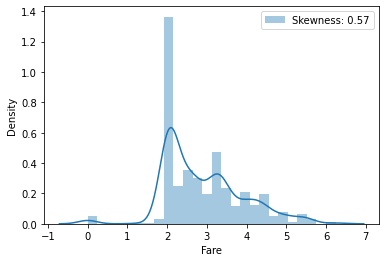

In [986]:
#apply log transformation to fare column to reduce skewness

combine['Fare'] = combine['Fare'].map(lambda x:np.log(x) if x > 0 else 0)

#fare distribution after log transformation

sns.distplot(combine['Fare'],label = 'Skewness: %.2f'%(combine['Fare'].skew()))
plt.legend(loc='best')

Feature Engineering:

Most important Art of machine learning
Create new features from existing features

In [987]:
#title feature 1
combine.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,S


In [988]:
#get title from name
combine['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combine['Name']]
combine[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [989]:
combine['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [990]:
combine['Title'].nunique()

18

<AxesSubplot:xlabel='Title', ylabel='count'>

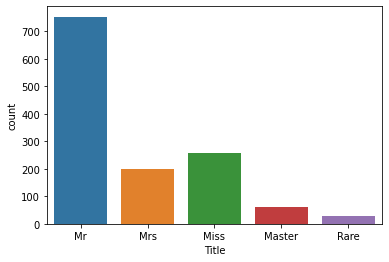

In [991]:
#simplify the titles

combine['Title'] = combine['Title'].replace(['Dr', 'Rev','Col','Major', 'Lady','Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combine['Title'] = combine['Title'].replace(['Mlle', 'Ms'], 'Miss')
combine['Title'] = combine['Title'].replace('Mme', 'Mrs')           

sns.countplot(combine['Title'])

In [992]:
combine[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of Survivalbyh Title')

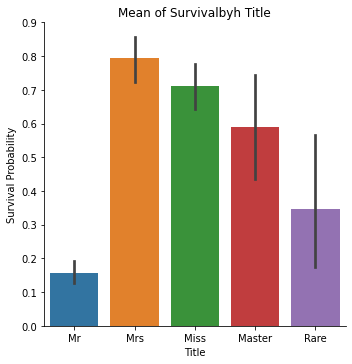

In [993]:
sns.factorplot(x='Title', y='Survived', data=combine, kind='bar')
plt.ylabel('Survival Probability')
plt.title('Mean of Survivalbyh Title')

In [994]:
#drop the name column

combine = combine.drop('Name', axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


In [995]:
#calculate the family sie from SibSp and Parch

combine['FamilySize'] = combine['SibSp'] + combine['Parch'] +1
#print(combine)
combine[['SibSp', 'Parch', 'FamilySize']].head(15) #data frame .head() is used to get the number of rows

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [996]:
#what is the mean survival by family size
combine[['FamilySize', 'Survived']].groupby('FamilySize', as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [997]:
#create an isalone feature

combine['IsAlone'] = 0
combine.loc[combine['FamilySize'] == 1, 'IsAlone'] = 1

#the mean survival for an IsAlone
combine[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean().sort_values(by='Survived', ascending=False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [998]:
#from the combined df, drop SibSp, Parch and familySize features 

combine = combine.drop(['SibSp', 'Parch', 'FamilySize'], axis=1)
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


Create an Age*Class feature
-> transform age into an ordinary variable
ordinary vars- more categorical with intrinsic ordering of their values

Group ages into five bands and assign a number to each age band


In [999]:
#create an age band and compute mean of survival by age bands

combine['AgeBand'] = pd.cut(combine['Age'], 5)
combine[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [1000]:
#Assign ordinals to each age band

combine.loc[combine['Age']<=16.136, 'Age'] = 0
combine.loc[(combine['Age'] > 16.136) & (combine['Age'] <= 32.102), 'Age'] = 1
combine.loc[(combine['Age'] > 32.102) & (combine['Age'] <= 48.068), 'Age'] = 2
combine.loc[(combine['Age'] > 48.068) & (combine['Age'] <= 64.034), 'Age'] = 3
combine.loc[combine['Age']<=64.034, 'Age'] = 4

In [1001]:
#drop age band features
#drop -> remove certain rows and columns by specifying the label names or corresponding index

combine = combine.drop('AgeBand', axis=1)

#age and Pclass data types
combine[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [1002]:
#convert the ordinal age into int data type

combine['Age'] = combine['Age'].astype('int')
combine['Age'].dtype

dtype('int64')

In [1003]:
#create an age-class feature

combine['Age*Class'] = combine['Age'] * combine['Pclass']
combine[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,4,3,12
1,4,1,4
2,4,3,12
3,4,1,4
4,4,3,12


Feature Encoding: ML models require all i/p and o/p variables to be numeric. Hence the need to encode all the categorical data befpre befpre fitting it into the model

-> Encode: Title and Embark
-> Ordinate Fare : rather than having a continous stream of data, we will have classes

In [1004]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,4,1.981001,S,Mr,0,12
1,2,1.0,1,1,4,4.266662,C,Mrs,0,4
2,3,1.0,3,1,4,2.070022,S,Miss,1,12
3,4,1.0,1,1,4,3.972177,S,Mrs,0,4
4,5,0.0,3,0,4,2.085672,S,Mr,1,12


In [1005]:
#encode `title and embarked features: encode using dummies


combine = pd.get_dummies(combine, columns=['Title'])
combine = pd.get_dummies(combine, columns=['Embarked'], prefix='Em')
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,4,1.981001,0,12,0,0,1,0,0,0,0,1
1,2,1.0,1,1,4,4.266662,0,4,0,0,0,1,0,1,0,0
2,3,1.0,3,1,4,2.070022,1,12,0,1,0,0,0,0,0,1
3,4,1.0,1,1,4,3.972177,0,4,0,0,0,1,0,0,0,1
4,5,0.0,3,0,4,2.085672,1,12,0,0,1,0,0,0,0,1


In [1006]:
#divide fare into 4 bands

combine['FareBand'] = pd.cut(combine['Fare'], 4)
combine[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [1007]:
combine.loc[combine['Fare'] <= 1.56, 'Fare'] = 0
combine.loc[(combine['Fare'] > 1.56) & (combine['Fare'] <= 3.119), 'Fare'] = 1
combine.loc[(combine['Fare'] > 3.119) & (combine['Fare'] <= 4.679), 'Fare'] = 2
combine.loc[combine['Fare'] > 4.679, 'Fare'] = 3

#convert fare into integer

combine['Fare'] = combine['Fare'].astype('int')

#drop the Fareband feature: remove fareband column/ row

combine = combine.drop('FareBand', axis=1)

In [1008]:
combine.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,4,1,0,12,0,0,1,0,0,0,0,1
1,2,1.0,1,1,4,2,0,4,0,0,0,1,0,1,0,0
2,3,1.0,3,1,4,1,1,12,0,1,0,0,0,0,0,1
3,4,1.0,1,1,4,2,0,4,0,0,0,1,0,0,0,1
4,5,0.0,3,0,4,1,1,12,0,0,1,0,0,0,0,1


In [1009]:
#separate the training set and the test set from the combined dataframe

train = combine[:len(train)]
test = combine[len(train):]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,1,0.0,3,0,4,1,0,12,0,0,1,0,0,0,0,1
1,2,1.0,1,1,4,2,0,4,0,0,0,1,0,1,0,0
2,3,1.0,3,1,4,1,1,12,0,1,0,0,0,0,0,1
3,4,1.0,1,1,4,2,0,4,0,0,0,1,0,0,0,1
4,5,0.0,3,0,4,1,1,12,0,0,1,0,0,0,0,1


In [1010]:
#from the training dataset drop the passanger ID

train = train.drop('PassengerId', axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0.0,3,0,4,1,0,12,0,0,1,0,0,0,0,1
1,1.0,1,1,4,2,0,4,0,0,0,1,0,1,0,0
2,1.0,3,1,4,1,1,12,0,1,0,0,0,0,0,1
3,1.0,1,1,4,2,0,4,0,0,0,1,0,0,0,1
4,0.0,3,0,4,1,1,12,0,0,1,0,0,0,0,1


In [1011]:
#in the trainng data set, convert survived back to integer

train['Survived'] = train['Survived'].astype('int')

In [1012]:
#drop Survives fromtest
test = test.drop('Survived', axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
881,892,3,0,4,1,1,12,0,0,1,0,0,0,1,0
882,893,3,1,4,1,0,12,0,0,0,1,0,0,0,1
883,894,2,0,4,1,1,8,0,0,1,0,0,0,1,0
884,895,3,0,4,1,1,12,0,0,1,0,0,0,0,1
885,896,3,1,4,1,0,12,0,0,0,1,0,0,0,1


In [1013]:
train.head()

,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Em_C,Em_Q,Em_S
0,0,3,0,4,1,0,12,0,0,1,0,0,0,0,1
1,1,1,1,4,2,0,4,0,0,0,1,0,1,0,0
2,1,3,1,4,1,1,12,0,1,0,0,0,0,0,1
3,1,1,1,4,2,0,4,0,0,0,1,0,0,0,1
4,0,3,0,4,1,1,12,0,0,1,0,0,0,0,1


The dataframes we have been prepping are ready for modelling.

-> We'll make use of scikit learn for the ML task
-> titanic is a classification problem : classifier models are the ones required to train the model to give predictions

1. Split training data: into independent/ predictor variables, x, and dependent/response variables rep by y.
y_train: is the survived and x_train, are other params:
our model ought to learn to classify surviaval.

y_train based on all x_train and make predictions on x_test.

In [1014]:
x_train = train.drop('Survived', axis=1) #drop survived for the x_train dataset
y_train = train['Survived'] #only have Survived for the y dataset
x_test = test.drop('PassengerId', axis=1).copy()

print("x_train", x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)

x_train (881, 14)
y_train (881,)
x_test (418, 14)


Traing a Model:
1. Instantiate that model
2. Fit the model to the training set
3. Predict the data in test set

In [1015]:
#1. Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.27

In [1016]:
#2. Suport Vector Machine
svc = SVC()

svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

acc_svc = round(svc.score(x_train, y_train)*100, 2)
acc_svc

79.0

In [1017]:
#K-nearest neighbours (KNN)

knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = round(knn.score(x_train, y_train)*100, 2)
acc_knn

83.09

In [1018]:
#Gaussian Naive bayes

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)

acc_gaussian = round(gaussian.score(x_train, y_train)*100, 2)
acc_gaussian

78.43

In [1019]:
#Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
acc_perceptron = round(perceptron.score(x_train, y_train)* 100, 2)
acc_perceptron

72.64

In [1020]:
#linear Support Vector Machine

linear_svc = LinearSVC()

linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)

score = linear_svc.score(x_train, y_train)
score = score * 100
acc_lsvc = round(score, 2)
acc_lsvc

81.61

In [1021]:
#stochastic gradient descent
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_test)
score_sgd = sgd.score(x_train, y_train)
score_sgd = score_sgd*100

acc_sgd = round(score_sgd, 2)
acc_sgd

69.47

In [1022]:
# decision trees

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred = decision_tree.predict(x_test)
score_tree = decision_tree.score(x_train, y_train)

score_tree = score_tree*100
acc_tree = round(score_tree, 2)
acc_tree

84.56

In [1023]:
#Random Forest
rand_forest = RandomForestClassifier(n_estimators=100)
rand_forest.fit(x_train, y_train)

y_pred = rand_forest.predict(x_test)

score_rand = rand_forest.score(x_train, y_train)*100
acc_rand_forest = round(score_rand, 2)
acc_rand_forest

84.56

In [1024]:
#cat boost

catboost = CatBoostClassifier()
catboost.fit(x_train,y_train)
y_pred = catboost.predict(x_test)

score_cat = catboost.score(x_train, y_train)*100
score_cat = round(score_cat, 2)

score_cat

Learning rate set to 0.00976
0:	learn: 0.6866955	total: 476us	remaining: 476ms
1:	learn: 0.6797816	total: 980us	remaining: 489ms
2:	learn: 0.6730196	total: 1.59ms	remaining: 528ms
3:	learn: 0.6664392	total: 2.08ms	remaining: 519ms
4:	learn: 0.6606148	total: 2.54ms	remaining: 507ms
5:	learn: 0.6542645	total: 3.31ms	remaining: 548ms
6:	learn: 0.6479400	total: 3.85ms	remaining: 547ms
7:	learn: 0.6425399	total: 4.34ms	remaining: 539ms
8:	learn: 0.6374567	total: 5.16ms	remaining: 568ms
9:	learn: 0.6340563	total: 5.52ms	remaining: 547ms
10:	learn: 0.6287224	total: 6.06ms	remaining: 545ms
11:	learn: 0.6235448	total: 6.82ms	remaining: 562ms
12:	learn: 0.6182335	total: 7.44ms	remaining: 565ms
13:	learn: 0.6126775	total: 7.91ms	remaining: 557ms
14:	learn: 0.6075489	total: 8.43ms	remaining: 554ms
15:	learn: 0.6028396	total: 8.95ms	remaining: 550ms
16:	learn: 0.5981646	total: 9.54ms	remaining: 552ms
17:	learn: 0.5942444	total: 10ms	remaining: 546ms
18:	learn: 0.5892006	total: 10.5ms	remaining: 545

84.34

Evaluation and Hyperparameter Tuning / Optimization.
-> best prediction accuracy

View the training accuracy

In [1025]:
models = pd.DataFrame({'Model': ['SVC', 'KNN', 'Log_Reg', 'Rand_For',
                                'Naive B', 'Perceptron', 'SDG',
                                'Decision_Tree', 'CatBoost', 'LinearSVC'],
                                
                        'Score': [acc_svc, acc_knn, acc_log, acc_perceptron,
                                    acc_gaussian,acc_perceptron, acc_sgd,
                                    acc_tree,score_cat,acc_lsvc]})

models.sort_values(by='Score', ascending=False, ignore_index=True)

,Model,Score
0,Decision_Tree,84.56
1,CatBoost,84.34
2,KNN,83.09
3,LinearSVC,81.61
4,Log_Reg,81.27
5,SVC,79.00
6,Naive B,78.43
7,Rand_For,72.64
8,Perceptron,72.64
9,SDG,69.47


K-Fold Cross Validation: How well can our models predict new data???

In [1026]:
#create a list of classifiers

classifiers = []

classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors=5))
classifiers.append(GaussianNB())
classifiers.append(Perceptron())
classifiers.append(LinearSVC())
classifiers.append(SGDClassifier())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

In [1027]:
#create a list containing x-validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring='accuracy', cv=10))

Learning rate set to 0.009326
0:	learn: 0.6873364	total: 422us	remaining: 422ms
1:	learn: 0.6808583	total: 881us	remaining: 440ms
2:	learn: 0.6742695	total: 1.36ms	remaining: 453ms
3:	learn: 0.6684061	total: 1.8ms	remaining: 448ms
4:	learn: 0.6630569	total: 2.22ms	remaining: 442ms
5:	learn: 0.6573756	total: 2.64ms	remaining: 438ms
6:	learn: 0.6523163	total: 3.05ms	remaining: 433ms
7:	learn: 0.6470018	total: 3.44ms	remaining: 427ms
8:	learn: 0.6418432	total: 3.83ms	remaining: 422ms
9:	learn: 0.6358733	total: 4.22ms	remaining: 418ms
10:	learn: 0.6313239	total: 4.61ms	remaining: 414ms
11:	learn: 0.6281549	total: 4.91ms	remaining: 404ms
12:	learn: 0.6236353	total: 5.29ms	remaining: 402ms
13:	learn: 0.6197919	total: 5.65ms	remaining: 398ms
14:	learn: 0.6148475	total: 6.03ms	remaining: 396ms
15:	learn: 0.6108028	total: 6.38ms	remaining: 393ms
16:	learn: 0.6073351	total: 6.67ms	remaining: 386ms
17:	learn: 0.6025735	total: 7.07ms	remaining: 386ms
18:	learn: 0.5978900	total: 7.47ms	remaining: 3

In [1028]:
cv_mean = []
cv_std = []

for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [1029]:
cv_res = pd.DataFrame({'Cross_Val_Mean': cv_mean, 'Cross_Val_Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN', 'Gausian Naive Bayes', 'Perceptron', 'Linear SVC', 'Stochastic Gradient Descent', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by='Cross_Val_Mean', ascending=False, ignore_index=True)

,Cross_Val_Mean,Cross_Val_Std,Algorithm
0,0.820672,0.034687,Random Forest
1,0.817275,0.039063,CatBoost
2,0.813853,0.039069,Decision Tree
3,0.810419,0.034598,KNN
4,0.805899,0.029844,Logistic Regression
5,0.799119,0.033152,Linear SVC
6,0.786593,0.029185,Support Vector Machines
7,0.785508,0.036545,Perceptron
8,0.761670,0.057993,Stochastic Gradient Descent
9,0.736645,0.123767,Gausian Naive Bayes


Text(0.5, 1.0, 'Cross Validation Scores')

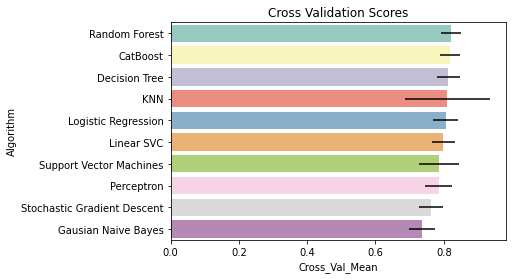

In [1030]:
sns.barplot('Cross_Val_Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross_Val_Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': cv_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

Since the Random Forest has the highest cross val mean, we proceed with its tuning


In [1031]:
#tune using GridSearchCV

param_grid = {'C' : [0.1,1,100,1000],
               'gamma': [1,0.1,0.01,0.001,0.0001],
               'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)               

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.791 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.818 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.784 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.830 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.701 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.801 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.678 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [1032]:
print("best params: ", grid.best_params_)
print("best estimator: ", grid.best_estimator_)

best params:  {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
best estimator:  SVC(C=1000, gamma=0.01)


In [1041]:
#training accuracy
svc = SVC(C=1000, gamma=0.01, kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

84.11

In [1042]:
#mean cross validation score

cross_val_score(svc, x_train, y_train, scoring='accuracy', cv=10).mean()

0.8274897854954034

In [1045]:
y_pred
len(y_pred)

418

In [1046]:
ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1049]:
ss.shape

(418, 2)

In [1053]:
submit = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived':y_pred})
submit.head()

,PassengerId,Survived
881,892,0
882,893,1
883,894,0
884,895,0
885,896,1


In [1054]:
submit.to_csv('./Support_Vector_machine.csv', index=False)